<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib 
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 123.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 129.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 119.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 137.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 137.3 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [26]:

file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




In [32]:
# Keep rows with non-null Age and JobSatPoints_6
df_cleaned = df[['Age', 'JobSatPoints_6']].dropna()

# Optional: Count how many rows remain
print(f"Usable rows: {df_cleaned.shape[0]}")

Usable rows: 29450


In [33]:
# Define mapping from age ranges to midpoints
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}

df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_map)

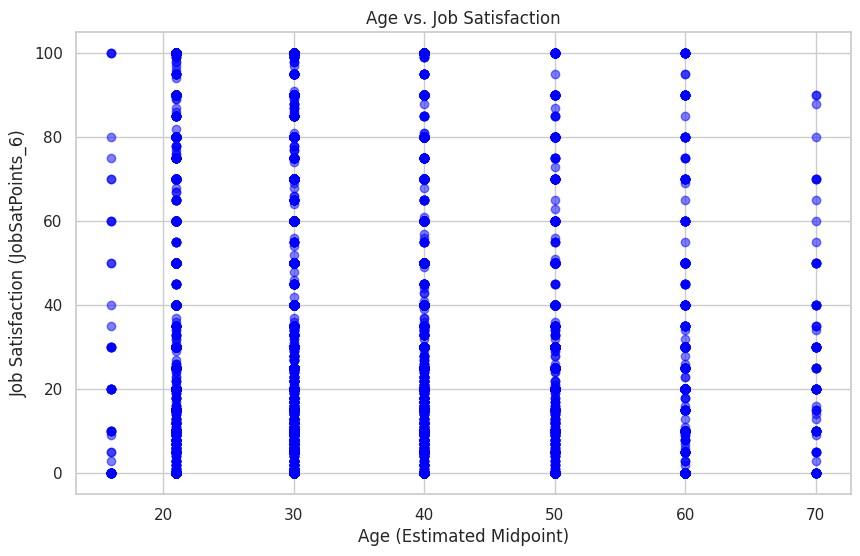

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AgeNumeric'], df_cleaned['JobSatPoints_6'], alpha=0.5, color='blue')
plt.title('Age vs. Job Satisfaction')
plt.xlabel('Age (Estimated Midpoint)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


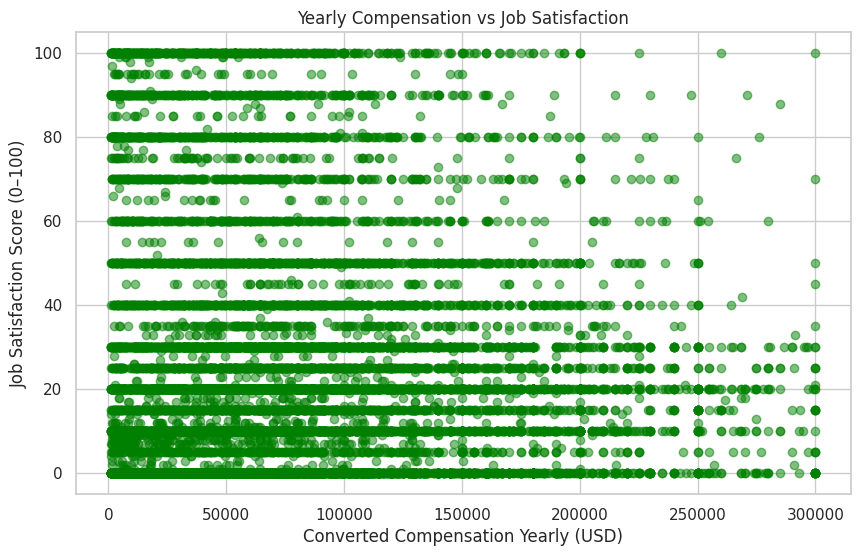

In [35]:
# Clean: keep rows with non-null values
df_cleaned = df[['ConvertedCompYearly', 'JobSatPoints_6']].dropna()

# Filter to reasonable ranges to avoid outliers skewing the plot
df_filtered = df_cleaned[
    (df_cleaned['ConvertedCompYearly'].between(1000, 300000)) &
    (df_cleaned['JobSatPoints_6'].between(0, 100))
]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_filtered['ConvertedCompYearly'], df_filtered['JobSatPoints_6'], alpha=0.5, color='green')
plt.title('Yearly Compensation vs Job Satisfaction')
plt.xlabel('Converted Compensation Yearly (USD)')
plt.ylabel('Job Satisfaction Score (0–100)')
plt.grid(True)
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


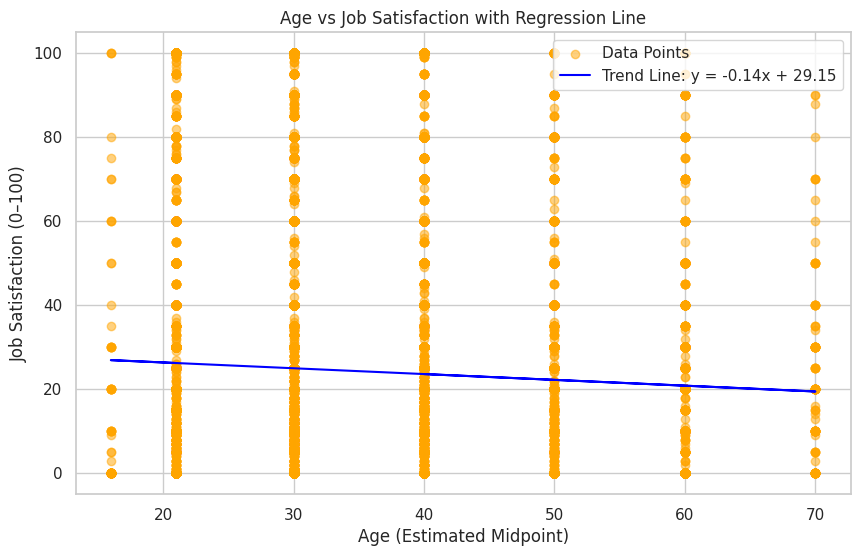

In [36]:
# Keep only non-null values
df_cleaned = df[['Age', 'JobSatPoints_6']].dropna()

# Convert age ranges to estimated numeric midpoints
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_map)

# Drop rows where mapping failed
df_cleaned = df_cleaned.dropna(subset=['AgeNumeric', 'JobSatPoints_6'])

# Extract x and y for regression
x = df_cleaned['AgeNumeric'].values
y = df_cleaned['JobSatPoints_6'].values

# Fit regression line
m, c = np.polyfit(x, y, 1)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Data Points', color='orange')
plt.plot(x, m*x + c, color='blue', label=f'Trend Line: y = {m:.2f}x + {c:.2f}')
plt.title('Age vs Job Satisfaction with Regression Line')
plt.xlabel('Age (Estimated Midpoint)')
plt.ylabel('Job Satisfaction (0–100)')
plt.grid(True)
plt.legend()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


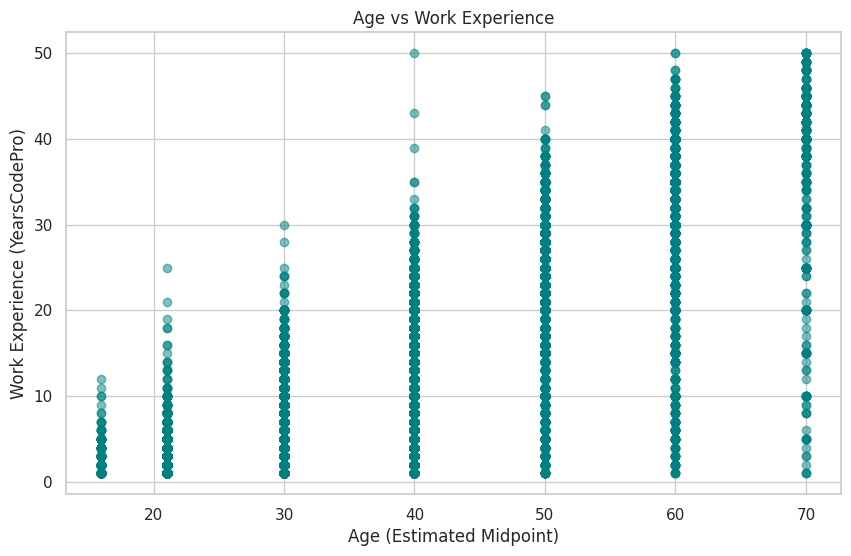

In [39]:
# Select and drop nulls
df_cleaned = df[['Age', 'YearsCodePro']].dropna()

# Map age ranges to midpoints
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_map)

# Ensure work experience is numeric
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')

# Final cleanup
df_cleaned = df_cleaned.dropna(subset=['AgeNumeric', 'YearsCodePro'])
plt.figure(figsize=(10, 6))
plt.scatter(df_cleaned['AgeNumeric'], df_cleaned['YearsCodePro'], alpha=0.5, color='teal')
plt.title('Age vs Work Experience')
plt.xlabel('Age (Estimated Midpoint)')
plt.ylabel('Work Experience (YearsCodePro)')
plt.grid(True)
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


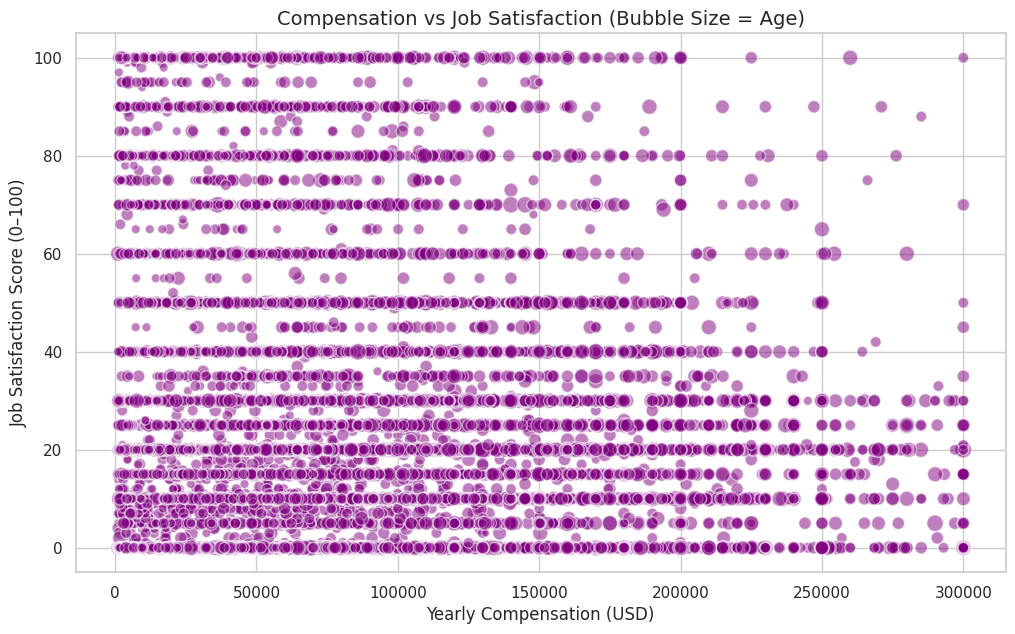

In [41]:
# Keep only relevant columns and drop missing values
df_cleaned = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].dropna()

# Map age ranges to numeric estimates for bubble size
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_map)

# Filter for reasonable values
df_filtered = df_cleaned[
    (df_cleaned['ConvertedCompYearly'].between(1000, 300000)) &
    (df_cleaned['JobSatPoints_6'].between(0, 100)) &
    (df_cleaned['AgeNumeric'].notna())
]
plt.figure(figsize=(12, 7))
plt.scatter(
    df_filtered['ConvertedCompYearly'],
    df_filtered['JobSatPoints_6'],
    s=df_filtered['AgeNumeric'] * 2,       # Bubble size scaled
    alpha=0.5,
    color='purple',
    edgecolors='w'
)

plt.title('Compensation vs Job Satisfaction (Bubble Size = Age)', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction Score (0–100)', fontsize=12)
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


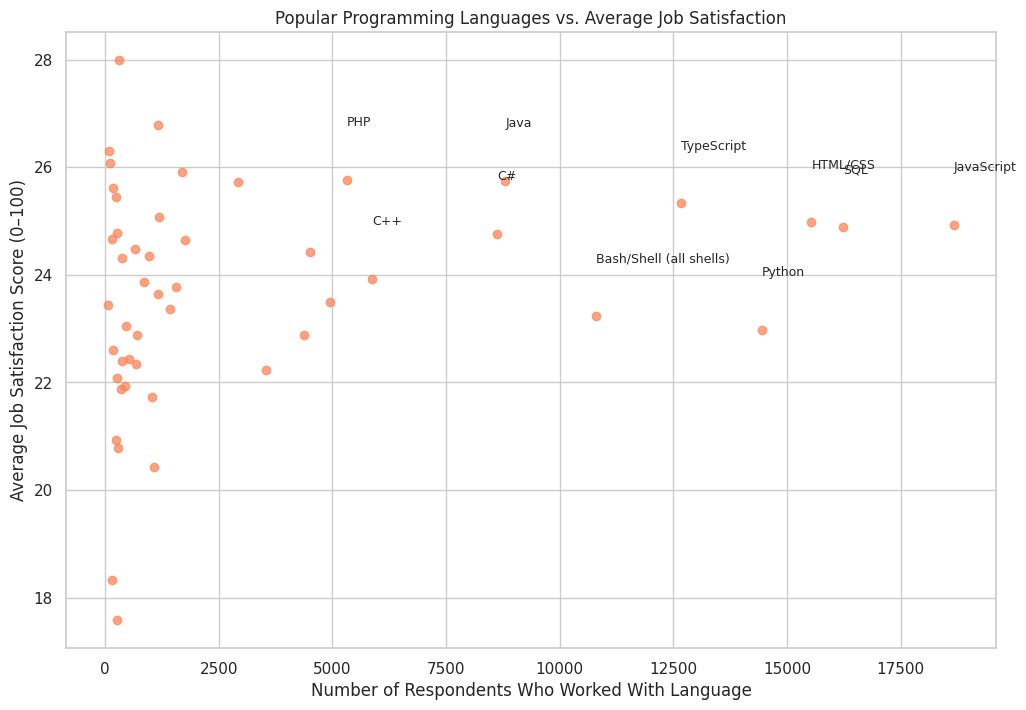

In [43]:
# Keep relevant columns and drop missing values
df_lang = df[['LanguageHaveWorkedWith', 'JobSatPoints_6']].dropna()
# Expand rows: one language per row
df_lang_expanded = df_lang.assign(
    Language=df_lang['LanguageHaveWorkedWith'].str.split(';')
).explode('Language')

# Strip extra spaces
df_lang_expanded['Language'] = df_lang_expanded['Language'].str.strip()
lang_sat = df_lang_expanded.groupby('Language')['JobSatPoints_6'].mean().reset_index()
lang_count = df_lang_expanded['Language'].value_counts().reset_index()
lang_count.columns = ['Language', 'Count']

# Merge satisfaction and count to get popularity
lang_stats = pd.merge(lang_sat, lang_count, on='Language')

plt.figure(figsize=(12, 8))
plt.scatter(lang_stats['Count'], lang_stats['JobSatPoints_6'], alpha=0.7, color='coral')
plt.title('Popular Programming Languages vs. Average Job Satisfaction')
plt.xlabel('Number of Respondents Who Worked With Language')
plt.ylabel('Average Job Satisfaction Score (0–100)')
plt.grid(True)

# Optional: Annotate top languages
top_langs = lang_stats.sort_values(by='Count', ascending=False).head(10)
for _, row in top_langs.iterrows():
    plt.text(row['Count'], row['JobSatPoints_6'] + 1, row['Language'], fontsize=9)

plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


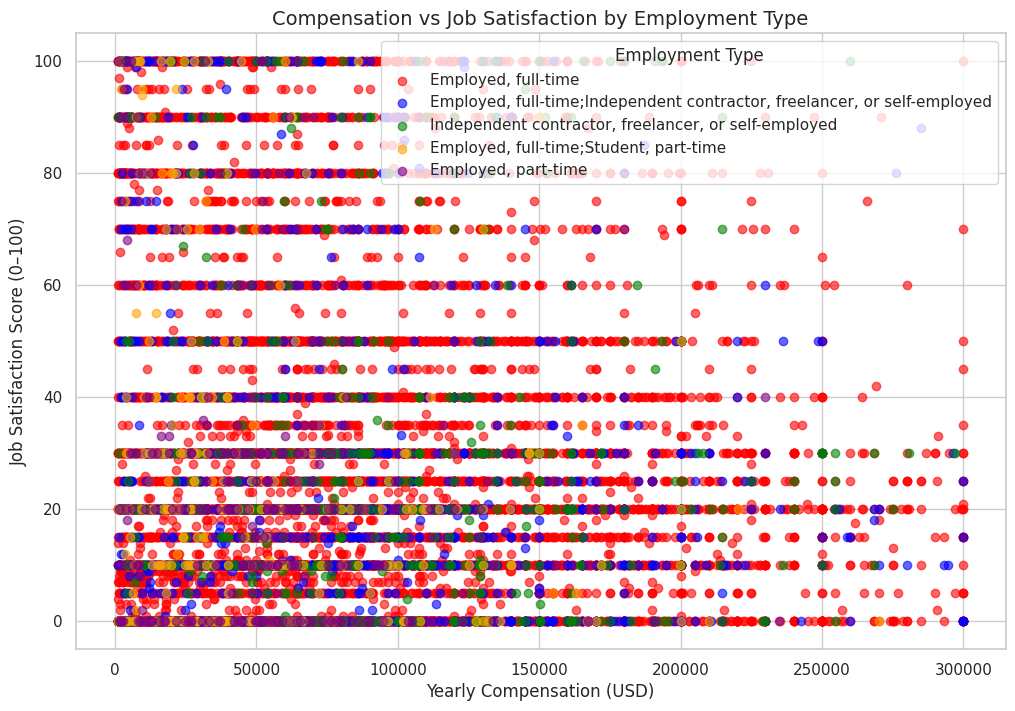

In [44]:
# Select relevant columns and drop rows with missing values
df_cleaned = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()

# Filter for reasonable ranges
df_filtered = df_cleaned[
    (df_cleaned['ConvertedCompYearly'].between(1000, 300000)) &
    (df_cleaned['JobSatPoints_6'].between(0, 100))
]
plt.figure(figsize=(12, 8))

# Get unique employment types (limit to top N if too many categories)
top_employment_types = df_filtered['Employment'].value_counts().index[:5]  # Top 5 for clarity
colors = ['red', 'blue', 'green', 'orange', 'purple']

for i, emp_type in enumerate(top_employment_types):
    subset = df_filtered[df_filtered['Employment'] == emp_type]
    plt.scatter(
        subset['ConvertedCompYearly'],
        subset['JobSatPoints_6'],
        alpha=0.6,
        label=emp_type,
        color=colors[i % len(colors)]
    )

plt.title('Compensation vs Job Satisfaction by Employment Type', fontsize=14)
plt.xlabel('Yearly Compensation (USD)', fontsize=12)
plt.ylabel('Job Satisfaction Score (0–100)', fontsize=12)
plt.legend(title='Employment Type')
plt.grid(True)
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


# Keep relevant columns and drop missing values
df_cleaned = df[['YearsCodePro', 'Age', 'Country']].dropna()

# Convert YearsCodePro to numeric
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')

# Map Age to midpoint for plotting (you can also keep as categorical if you prefer markers)
age_map = {
    "Under 18 years old": 16,
    "18-24 years old": 21,
    "25-34 years old": 30,
    "35-44 years old": 40,
    "45-54 years old": 50,
    "55-64 years old": 60,
    "65 years or older": 70
}
df_cleaned['AgeNumeric'] = df_cleaned['Age'].map(age_map)

# Final cleanup
df_cleaned = df_cleaned.dropna(subset=['YearsCodePro', 'AgeNumeric', 'Country'])

# Set up plot
plt.figure(figsize=(12, 8))

# Choose top countries for visibility
top_countries = df_cleaned['Country'].value_counts().index[:5]
markers = ['o', 's', 'D', '^', 'P', '*', 'X']
colors = ['red', 'blue', 'green', 'orange', 'purple']

# Loop through countries
for i, country in enumerate(top_countries):
    subset = df_cleaned[df_cleaned['Country'] == country]
    for j, (age_band, age_val) in enumerate(age_map.items()):
        age_subset = subset[subset['Age'] == age_band]
        plt.scatter(
            age_subset['AgeNumeric'],
            age_subset['YearsCodePro'],
            label=f'{country} - {age_band}',
            alpha=0.6,
            marker=markers[j % len(markers)],
            color=colors[i % len(colors)]
        )

plt.title('Work Experience vs Age Group by Country', fontsize=14)
plt.xlabel('Age (Estimated Midpoint)', fontsize=12)
plt.ylabel('Professional Coding Experience (YearsCodePro)', fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Country - Age Group')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
